<a href="https://colab.research.google.com/github/lone-max/hello-world/blob/master/tipping_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 12.2MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=3392c099e4ad51cb8b77611a7a7d1bb8c88fb4f1f77433fa401f20fe454ce04b
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [2]:
import numpy as np

In [3]:
import skfuzzy as fuzz 


In [4]:
from skfuzzy import control as ctrl


In [5]:
#new antecedent/consequent objects hold universe variables and membership 
#functions 
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality') #range is from 1-10
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service') # range is from 1-10
tip =ctrl.Consequent(np.arange(0, 26, 1), 'tip') #range is from 1-25

In [6]:
#auto membership function population is possible with .automf(3,5,7)
quality.automf(3)
service.automf(3)

In [7]:
# custom membership can be built interactively with a familiar,

In [9]:
#pyhtonic API 
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

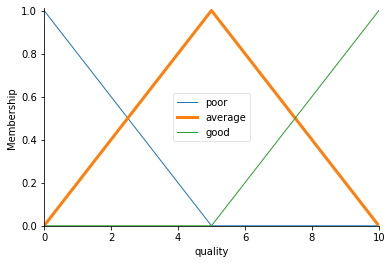

In [10]:
# you can see how this looks with .view()
quality['average'].view()

In [15]:
rule1 = ctrl.Rule(quality['poor'] | service ['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality ['good'], tip['high'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f092fb46940>)

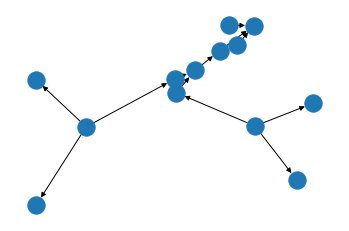

In [13]:
rule1.view()

In [18]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [17]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [19]:
#passs inputs into the control system using antecedent labels wiht pythonic API 
#note :if any
tipping.input ['quality']= 6.5
tipping.input['service']=9.3

In [20]:
#crunch the numbers
tipping.compute()

17.73710019476304


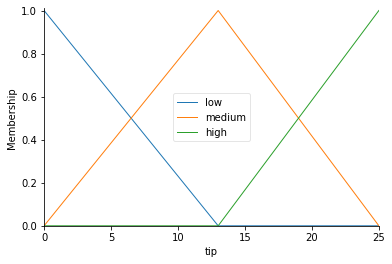

In [22]:
print(tipping.output['tip'])
tip.view(sin=tipping)